# Assignment No : 4

## Problem Statement:
Use Autoencoder to implement anomaly detection. Build the model by using:
a. Import required libraries
b. Upload / access the dataset
c. Encoder converts it into latent representation
d. Decoder networks convert it back to the original input
e. Compile the models with Optimizer, Loss, and Evaluation Metrics

## Objective:
The objective of anomaly detection is to find unexpected or rare events in data streams

## Methodology:
1.Deep Learning
2.TensorFlow

## Required libraries:
Pandas , Numpy , matplotlib , seaborn , Sklearn.

## Theory:
What is deep learning?
Deep learning is a type of machine learning and artificial intelligence (AI) that imitates the way humans gain
certain types of knowledge. Deep learning is an important element of data science, which includes statistics
and predictive modeling. It is extremely beneficial to data scientists who are tasked with collecting, analyzing
and interpreting large amounts of data; deep learning makes this process faster and easier.
What is anomaly detection?
Anomaly detection is a mathematical process used by data scientists to detect abnormalities within supervised
and unsupervised numerical data based on how different a data point is from its surrounding data points or from
the standard deviation. There are many different anomaly detection techniques, sometimes called outlier
detection algorithms, that each have different criteria for outlier detection and are therefore used for different
use cases. Anomaly detection is used across all the major data science technologies such as, Python and
Scikit-learn (SKlearn). All forms of anomaly detection rely on first building an understanding of standard results,
or normal instances, using time series data. Time series data is essentially a collection of values of the same
variable over a period of time. This does not typically mean constant or the same but rather changing in an
expected way. Each technique uses different estimator criteria to form the benchmark.
We need to create a single fully-connected neural layer as encoder and as decoder model, compile the models
with Optimizer, Loss and Evaluation Metrics. The loss function is usually either the mean- squared error or
cross-entropy between the output and the input, which we call ‘Reconstruction Loss’. It penalizes the network
for creating outputs different from the input. Then, we need to fit our model with the test data.
STEPS TO CREATE A SIMPLE AUTOENCODER
We will build a simple single fully-connected neural layer as encoder and as decoder to read a number present
in the image

-Let’s define the size of the Encoded representation.
-encoding_dim=32 #Assuming the input size= 100000
-encoded=Dense(encoding_dim, activation=’relu’)(input_img) ”encoded” is the encoded representation of the
input
-decoded=Dense(activation=’sigmoid’)(encoded) # ‘decoded’ is the lossy reconstruction of the input
-autoencoder=model(input_img, decoded) #this model maps an input to its reconstruction
-Lets create a separate encoder model
-encoder=model(input_img, encoded) #this model maps an input to its encoded representation
-encoded_input=Input (shape=(encoding_dim,)) # create a placeholder for an encoded (32-dimensional) input
-decoded_layer=autoencoder.layers[-1] #retrieve the last layer of the autoencoder model
-decoder=model(encoded_input, decoder_layer(encoded_input)) create the decoder model
-Now, lets train our autoencoder to reconstruct the digits
-autoencoder.compile(optimizer=’ada’, loss=’mae’)
-Prepare train data: x_train and test data: x_test
-autoencoder.fit(x_train,x_train, epochs=20, shuffle=True, validation_data=(x_test, x_test))
-encoded_img=encoder.predict(x_test)
-decoded_img=decoded.predict(encoded_img)

# Code and Output -

In [1]:
# Synthetic dataset
from sklearn.datasets import make_classification

# Data processing
import pandas as pd
import numpy as np
from collections import Counter

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model and performance
#!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
# Create an imbalanced dataset
X, y = make_classification(n_samples=100000, n_features=32, n_informative=32,
n_redundant=0, n_repeated=0, n_classes=2,
n_clusters_per_class=1,
weights=[0.995, 0.005],
class_sep=0.5, random_state=0)

In [5]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 80000
The number of records in the test dataset is 20000
The training dataset has 79200 records for the majority class and 800 records for the minority class.


In [6]:
# Keep only the normal data for the training dataset
X_train_normal = X_train[np.where(y_train == 0)]
# Input layer
input = tf.keras.layers.Input(shape=(32,))
# Encoder layers
encoder = tf.keras.Sequential([
layers.Dense(16, activation='relu'),
layers.Dense(8, activation='relu'),
layers.Dense(4, activation='relu')])(input)
# Decoder layers
decoder = tf.keras.Sequential([
layers.Dense(8, activation="relu"),
layers.Dense(16, activation="relu"),
layers.Dense(32, activation="sigmoid")])(encoder)
# Create the autoencoder
autoencoder = tf.keras.Model(inputs=input, outputs=decoder)

In [7]:
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mae')
# Fit the autoencoder
history = autoencoder.fit(X_train_normal, X_train_normal,
epochs=20,
batch_size=64,
validation_data=(X_test, X_test),
shuffle=True)

Epoch 1/20
1238/1238 [==============================] - 8s 4ms/step - loss: 2.5244 - val_loss: 2.4908
Epoch 2/20
1238/1238 [==============================] - 5s 4ms/step - loss: 2.4792 - val_loss: 2.4783
Epoch 3/20
1238/1238 [==============================] - 5s 4ms/step - loss: 2.4721 - val_loss: 2.4742
Epoch 4/20
1238/1238 [==============================] - 5s 4ms/step - loss: 2.4690 - val_loss: 2.4711
Epoch 5/20
1238/1238 [==============================] - 5s 4ms/step - loss: 2.4672 - val_loss: 2.4704
Epoch 6/20
1238/1238 [==============================] - 5s 4ms/step - loss: 2.4657 - val_loss: 2.4691
Epoch 7/20
1238/1238 [==============================] - 5s 4ms/step - loss: 2.4644 - val_loss: 2.4681
Epoch 8/20
1238/1238 [==============================] - 5s 4ms/step - loss: 2.4632 - val_loss: 2.4662
Epoch 9/20
1238/1238 [==============================] - 5s 4ms/step - loss: 2.4622 - val_loss: 2.4652
Epoch 10/20
1238/1238 [==============================] - 5s 4ms/step - loss: 2.461

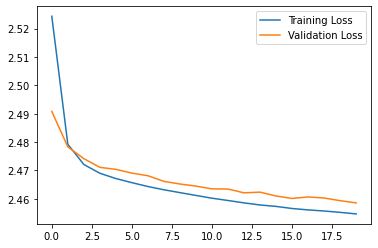

In [8]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"] , label="Validation Loss")
plt.legend();

In [9]:
# Predict anomalies/outliers in the training dataset
prediction = autoencoder.predict(X_test)

625/625 [==============================] - 3s 3ms/step


In [10]:
# Get the mean absolute error between actual and reconstruction/prediction
prediction_loss = tf.keras.losses.mae(prediction, X_test)

In [11]:
# Check the prediction loss threshold for 2% of outliers
loss_threshold = np.percentile(prediction_loss, 98)
print(f'The prediction loss threshold for 2% of outliers is {loss_threshold:.2f}')

The prediction loss threshold for 2% of outliers is 3.45


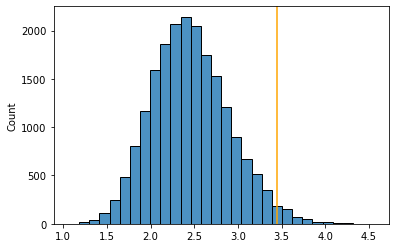

In [12]:
# Visualize the threshold
sns.histplot(prediction_loss, bins=30, alpha=0.8)
plt.axvline(x=loss_threshold, color='orange')

In [13]:
# Check the model performance at 2% threshold
threshold_prediction = [0 if i < loss_threshold else 1 for i in prediction_loss]
# Check the prediction performance
print(classification_report(y_test, threshold_prediction))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     19803
           1       0.00      0.01      0.00       197

    accuracy                           0.97     20000
   macro avg       0.50      0.49      0.49     20000
weighted avg       0.98      0.97      0.98     20000

